# Jupyter-NoteBook IndPenSim Import and Plot

## IndPenSim Data import 

Download data and unzip contents to current folder

### IndPenSim Data websites 
Addition details can be found at:<a href='http://www.industrialpenicillinsimulation.com/'> www.industrialpenicillinsimulation.com</a>
Data is downloaded from : <a href='https://data.mendeley.com/datasets/pdnjz7zz5x/1'> Mendeley data Website</a>

In [1]:
## Import necessary packages
from urllib.request import urlretrieve 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Unzip IndPenSim Data

In [2]:
## Unzipping data from folders 
# with zipfile.ZipFile("100_batches.zip","r") as zip_ref:
#     zip_ref.extractall()


# Converting batch and Ramna data into Dataframe
data = pd.read_csv('100_Batches_IndPenSim_V3.csv') 
# Converting summary statisic data into Dataframe
data_summary = pd.read_csv('100_Batches_IndPenSim_Statistics.csv')

In [3]:
print(data.shape)
print(data_summary.shape)

(113935, 2239)
(100, 5)


## Data Summary

In [4]:
# Summary of "Summary" data
data_summary

Batch ref  Penicllin_harvested_during_batch(kg)  \
0           1                             1066400.0   
1           2                              985910.0   
2           3                             1416100.0   
3           4                              815700.0   
4           5                             1128500.0   
..        ...                                   ...   
95         96                             1141500.0   
96         97                             1439400.0   
97         98                              799760.0   
98         99                              388650.0   
99        100                              753080.0   

    Penicllin_harvested_end_of_batch (kg)  Penicllin_yield_total (kg)  \
0                               1720000.0                   2786400.0   
1                               1340100.0                   2326000.0   
2                               1259200.0                   2675300.0   
3                               1071000.0                   1886700.0   
4                               2434400.0                   3562900.0   
..                                    ...                         ...   
95                              2453400.0                   3595000.0   
96                              2454900.0                   3894300.0   
97                               930830.0                   1730600.0   
98                               502180.0                    890830.0   
99                               801930.0                   1555000.0   

    Fault ref(0-NoFault 1-Fault)  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0  
..                           ...  
95                             1  
96                             1  
97                             1  
98                             1  
99                             1  

[100 rows x 5 columns]

In [5]:
data_summary.rename(
        columns={"Batch ref":"Batch ID",
                 "Fault ref(0-NoFault 1-Fault)":"Faulty"}, inplace=True)
data_summary

Batch ID  Penicllin_harvested_during_batch(kg)  \
0          1                             1066400.0   
1          2                              985910.0   
2          3                             1416100.0   
3          4                              815700.0   
4          5                             1128500.0   
..       ...                                   ...   
95        96                             1141500.0   
96        97                             1439400.0   
97        98                              799760.0   
98        99                              388650.0   
99       100                              753080.0   

    Penicllin_harvested_end_of_batch (kg)  Penicllin_yield_total (kg)  Faulty  
0                               1720000.0                   2786400.0       0  
1                               1340100.0                   2326000.0       0  
2                               1259200.0                   2675300.0       0  
3                               1071000.0                   1886700.0       0  
4                               2434400.0                   3562900.0       0  
..                                    ...                         ...     ...  
95                              2453400.0                   3595000.0       1  
96                              2454900.0                   3894300.0       1  
97                               930830.0                   1730600.0       1  
98                               502180.0                    890830.0       1  
99                               801930.0                   1555000.0       1  

[100 rows x 5 columns]

In [6]:
# Summary of "process" data
data

Time (h)  Aeration rate(Fg:L/h)  Agitator RPM(RPM:RPM)  \
0            0.2                     30                    100   
1            0.4                     30                    100   
2            0.6                     30                    100   
3            0.8                     30                    100   
4            1.0                     30                    100   
...          ...                    ...                    ...   
113930     229.2                     65                    100   
113931     229.4                     65                    100   
113932     229.6                     65                    100   
113933     229.8                     65                    100   
113934     230.0                     65                    100   

        Sugar feed rate(Fs:L/h)  Acid flow rate(Fa:L/h)  \
0                             8                  0.0000   
1                             8                  0.0000   
2                             8                  0.0000   
3                             8                  0.0000   
4                             8                  0.5181   
...                         ...                     ...   
113930                       80                  0.0000   
113931                       80                  0.0000   
113932                       80                  0.0000   
113933                       80                  0.0000   
113934                       80                  0.0000   

        Base flow rate(Fb:L/h)  Heating/cooling water flow rate(Fc:L/h)  \
0                      30.1180                                   9.8335   
1                      51.2210                                  18.1550   
2                      54.3020                                   9.5982   
3                      37.8160                                   4.3395   
4                      18.9080                                   1.1045   
...                        ...                                      ...   
113930                 12.9000                                  33.5860   
113931                 10.0470                                  10.0760   
113932                  7.3609                                  69.3450   
113933                  6.2794                                  38.6100   
113934                  7.3055                                  11.5830   

        Heating water flow rate(Fh:L/h)  Water for injection/dilution(Fw:L/h)  \
0                               0.00010                                     0   
1                               0.00010                                     0   
2                               0.00010                                     0   
3                               0.00010                                     0   
4                               0.00010                                     0   
...                                 ...                                   ...   
113930                          5.93590                                   250   
113931                         98.83400                                   250   
113932                          9.88340                                   250   
113933                          0.98834                                   250   
113934                         67.53600                                   250   

        Air head pressure(pressure:bar)  ...       210       209       208  \
0                                   0.6  ...       0.0       0.0       0.0   
1                                   0.6  ...       0.0       0.0       0.0   
2                                   0.6  ...       0.0       0.0       0.0   
3                                   0.6  ...       0.0       0.0       0.0   
4                                   0.6  ...       0.0       0.0       0.0   
...                                 ...  ...       ...       ...       ...   
113930                              0.9  ...  816050.0  823390.0  830160.0   
113931  


## Data Processing
### Split data into spectral and process data
Splitting the data into process measurement data and Raman spectroscopy data

In [7]:
raman_data = np.split(data, [data.columns.get_loc("2400")], axis=1)
process_data = raman_data[0]
process_data.describe()


c:\Users\eugen\Desktop\Repo\IndPenSim\indpensim-notebook\PenSim\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Time (h)  Aeration rate(Fg:L/h)  Agitator RPM(RPM:RPM)  \
count  113935.000000          113935.000000               113935.0   
mean      114.750656              65.246360                  100.0   
std        66.990504              11.690215                    0.0   
min         0.200000              20.000000                  100.0   
25%        57.000000              60.000000                  100.0   
50%       114.000000              65.000000                  100.0   
75%       171.000000              75.000000                  100.0   
max       290.000000              75.000000                  100.0   

       Sugar feed rate(Fs:L/h)  Acid flow rate(Fa:L/h)  \
count            113935.000000           113935.000000   
mean                 76.663764                0.073209   
std                  25.680134                0.552788   
min                   2.000000                0.000000   
25%                  72.000000                0.000000   
50%                  80.000000                0.000000   
75%                  90.000000                0.000000   
max                 150.000000               12.996000   

       Base flow rate(Fb:L/h)  Heating/cooling water flow rate(Fc:L/h)  \
count           113935.000000                            113935.000000   
mean                61.334389                                74.346341   
std                 44.972713                               108.022600   
min                  0.000000                                 0.000100   
25%                 35.766000                                11.157000   
50%                 55.407000                                34.384000   
75%                 76.271500                                94.904500   
max                225.000000                              1500.000000   

       Heating water flow rate(Fh:L/h)  Water for injection/dilution(Fw:L/h)  \
count                    113935.000000                         113935.000000   
mean                         20.763025                            154.811954   
std                          50.230266                            155.601474   
min                           0.000100                              0.000000   
25%                           0.000100                              0.000000   
50%                           0.159010                            100.000000   
75%                          11.640500                            250.000000   
max                        1500.000000                            500.000000   

       Air head pressure(pressure:bar)  ...  Ammonia shots(NH3_shots:kgs)  \
count                    113935.000000  ...                      113935.0   
mean                          0.945026  ...                           0.0   
std                           0.134269  ...                           0.0   
min                           0.600000  ...                           0.0   
25%                           0.900000  ...                           0.0   
50%                           0.900000  ...                           0.0   
75%                           1.100000  ...                           0.0   
max                           1.100000  ...                           0.0   

       Viscosity(Viscosity_offline:centPoise)  \
count                             2062.000000   
mean                                51.546454   
std                                 24.073778   
min                                  4.075300   
25%                                 34.812250   
50%                                 53.154000   
75%                                 73.536000   
max                                117.930000   

       Fault reference(Fault_ref:Fault ref)  \
count                         113935.000000   
mean                               0.011024   
std                                0.104415   
min                                0.000000   
25%                                0.000000   
50%                                0.000000   
75%  

In [8]:
process_data.columns 

Index(['Time (h)', 'Aeration rate(Fg:L/h)', 'Agitator RPM(RPM:RPM)',
       'Sugar feed rate(Fs:L/h)', 'Acid flow rate(Fa:L/h)',
       'Base flow rate(Fb:L/h)', 'Heating/cooling water flow rate(Fc:L/h)',
       'Heating water flow rate(Fh:L/h)',
       'Water for injection/dilution(Fw:L/h)',
       'Air head pressure(pressure:bar)', 'Dumped broth flow(Fremoved:L/h)',
       'Substrate concentration(S:g/L)',
       'Dissolved oxygen concentration(DO2:mg/L)',
       'Penicillin concentration(P:g/L)', 'Vessel Volume(V:L)',
       'Vessel Weight(Wt:Kg)', 'pH(pH:pH)', 'Temperature(T:K)',
       'Generated heat(Q:kJ)',
       'carbon dioxide percent in off-gas(CO2outgas:%)',
       'PAA flow(Fpaa:PAA flow (L/h))',
       'PAA concentration offline(PAA_offline:PAA (g L^{-1}))',
       'Oil flow(Foil:L/hr)',
       'NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))',
       'Oxygen Uptake Rate(OUR:(g min^{-1}))',
       'Oxygen in percent in off-gas(O2:O2  (%))',
       'Offline Penicil

In [9]:
process_data.rename(
        columns={"Batch reference(Batch_ref:Batch ref)":"Batch ID"},
        inplace=True)

### Reable Batch ID's correctly
process_data = process_data.rename(columns={'2-PAT control(PAT_ref:PAT ref)': 'Batch ID','Batch ID':'2-PAT control(PAT_ref:PAT ref)'})
raman_spectra = raman_data[1]
batch_ref_df = process_data[['Batch ID']]
raman_spectra_batch_id = pd.concat([batch_ref_df, raman_spectra], axis=1)
process_data.shape


(113935, 39)

In [10]:
process_data.columns

Index(['Time (h)', 'Aeration rate(Fg:L/h)', 'Agitator RPM(RPM:RPM)',
       'Sugar feed rate(Fs:L/h)', 'Acid flow rate(Fa:L/h)',
       'Base flow rate(Fb:L/h)', 'Heating/cooling water flow rate(Fc:L/h)',
       'Heating water flow rate(Fh:L/h)',
       'Water for injection/dilution(Fw:L/h)',
       'Air head pressure(pressure:bar)', 'Dumped broth flow(Fremoved:L/h)',
       'Substrate concentration(S:g/L)',
       'Dissolved oxygen concentration(DO2:mg/L)',
       'Penicillin concentration(P:g/L)', 'Vessel Volume(V:L)',
       'Vessel Weight(Wt:Kg)', 'pH(pH:pH)', 'Temperature(T:K)',
       'Generated heat(Q:kJ)',
       'carbon dioxide percent in off-gas(CO2outgas:%)',
       'PAA flow(Fpaa:PAA flow (L/h))',
       'PAA concentration offline(PAA_offline:PAA (g L^{-1}))',
       'Oil flow(Foil:L/hr)',
       'NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))',
       'Oxygen Uptake Rate(OUR:(g min^{-1}))',
       'Oxygen in percent in off-gas(O2:O2  (%))',
       'Offline Penicil

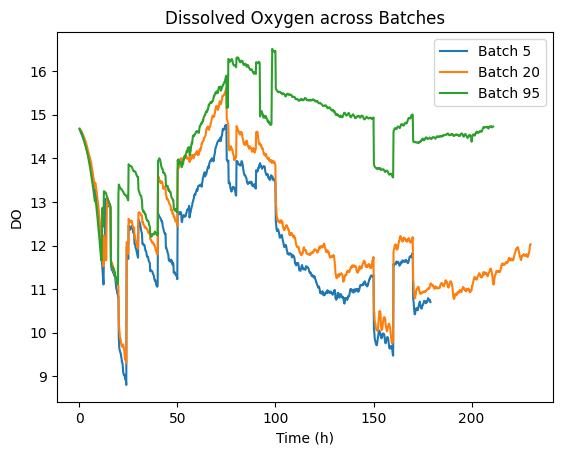

In [11]:
for batch in [5, 20, 95]:  # normal-normal-faulty
    subset = process_data[process_data['Batch ID'] == batch]
    plt.plot(subset['Time (h)'], subset['Dissolved oxygen concentration(DO2:mg/L)'], label=f'Batch {batch}')
plt.xlabel("Time (h)")
plt.ylabel("DO")
plt.title("Dissolved Oxygen across Batches")
plt.legend()
plt.show()

In [12]:
process_data.isnull().sum()

Time (h)                                                                   0
Aeration rate(Fg:L/h)                                                      0
Agitator RPM(RPM:RPM)                                                      0
Sugar feed rate(Fs:L/h)                                                    0
Acid flow rate(Fa:L/h)                                                     0
Base flow rate(Fb:L/h)                                                     0
Heating/cooling water flow rate(Fc:L/h)                                    0
Heating water flow rate(Fh:L/h)                                            0
Water for injection/dilution(Fw:L/h)                                       0
Air head pressure(pressure:bar)                                            0
Dumped broth flow(Fremoved:L/h)                                            0
Substrate concentration(S:g/L)                                             0
Dissolved oxygen concentration(DO2:mg/L)                                   0

In [13]:
process_data.columns

Index(['Time (h)', 'Aeration rate(Fg:L/h)', 'Agitator RPM(RPM:RPM)',
       'Sugar feed rate(Fs:L/h)', 'Acid flow rate(Fa:L/h)',
       'Base flow rate(Fb:L/h)', 'Heating/cooling water flow rate(Fc:L/h)',
       'Heating water flow rate(Fh:L/h)',
       'Water for injection/dilution(Fw:L/h)',
       'Air head pressure(pressure:bar)', 'Dumped broth flow(Fremoved:L/h)',
       'Substrate concentration(S:g/L)',
       'Dissolved oxygen concentration(DO2:mg/L)',
       'Penicillin concentration(P:g/L)', 'Vessel Volume(V:L)',
       'Vessel Weight(Wt:Kg)', 'pH(pH:pH)', 'Temperature(T:K)',
       'Generated heat(Q:kJ)',
       'carbon dioxide percent in off-gas(CO2outgas:%)',
       'PAA flow(Fpaa:PAA flow (L/h))',
       'PAA concentration offline(PAA_offline:PAA (g L^{-1}))',
       'Oil flow(Foil:L/hr)',
       'NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))',
       'Oxygen Uptake Rate(OUR:(g min^{-1}))',
       'Oxygen in percent in off-gas(O2:O2  (%))',
       'Offline Penicil

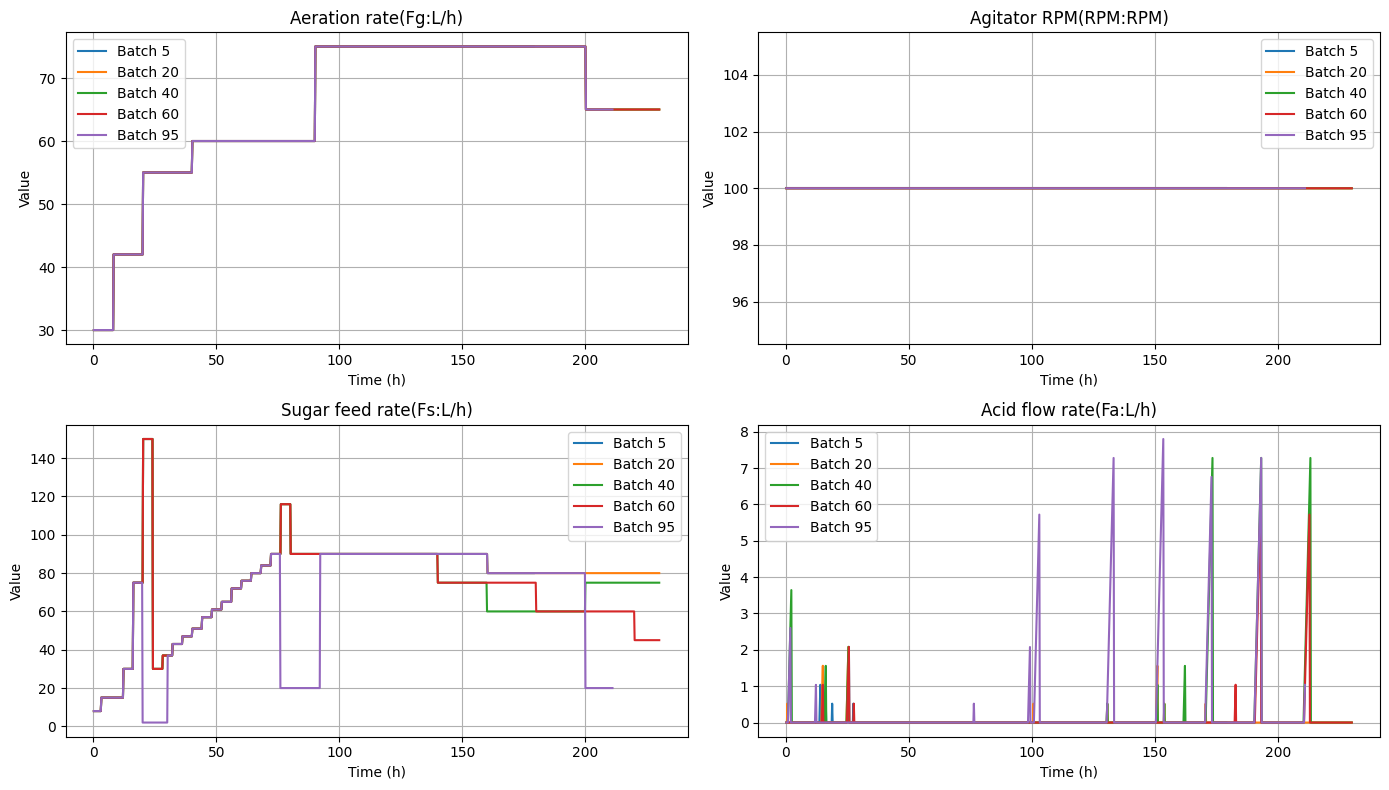

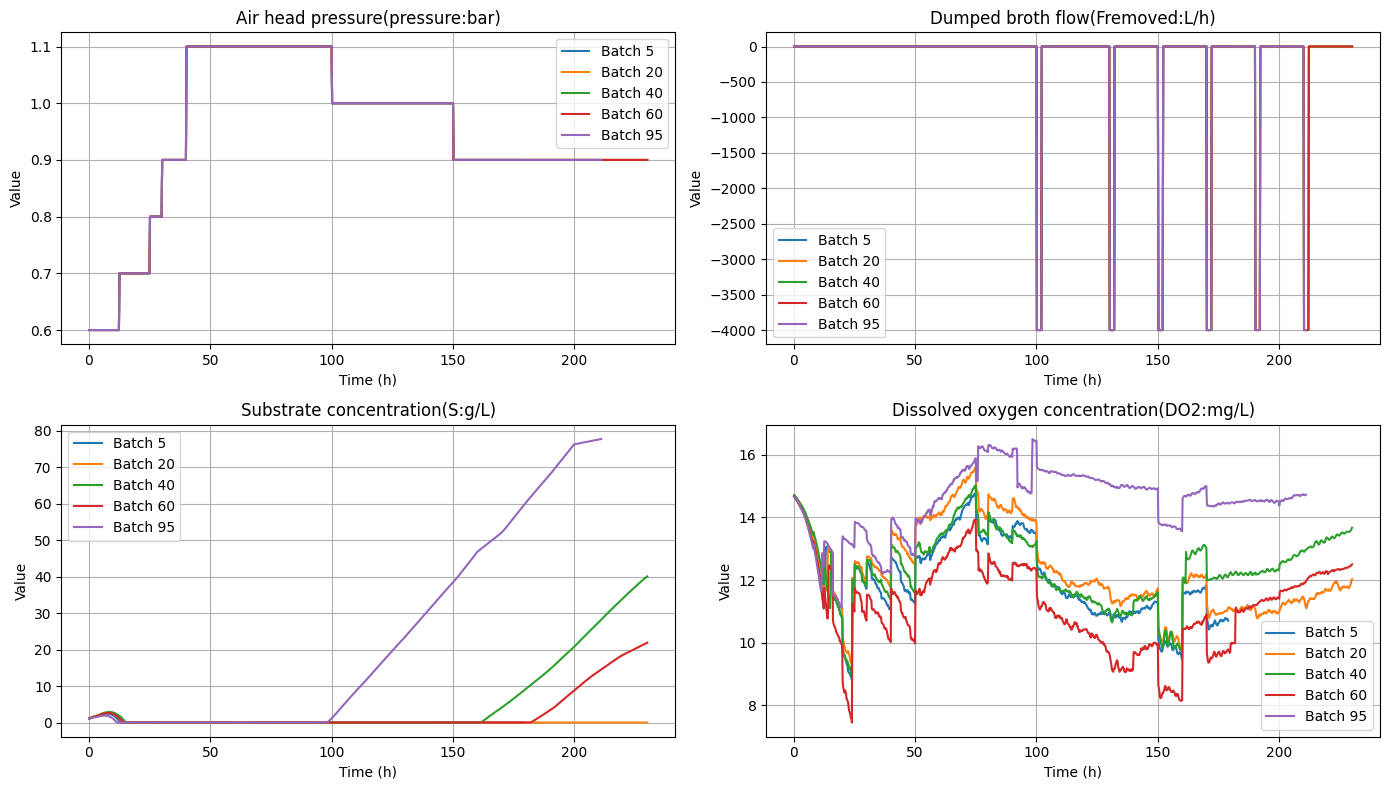

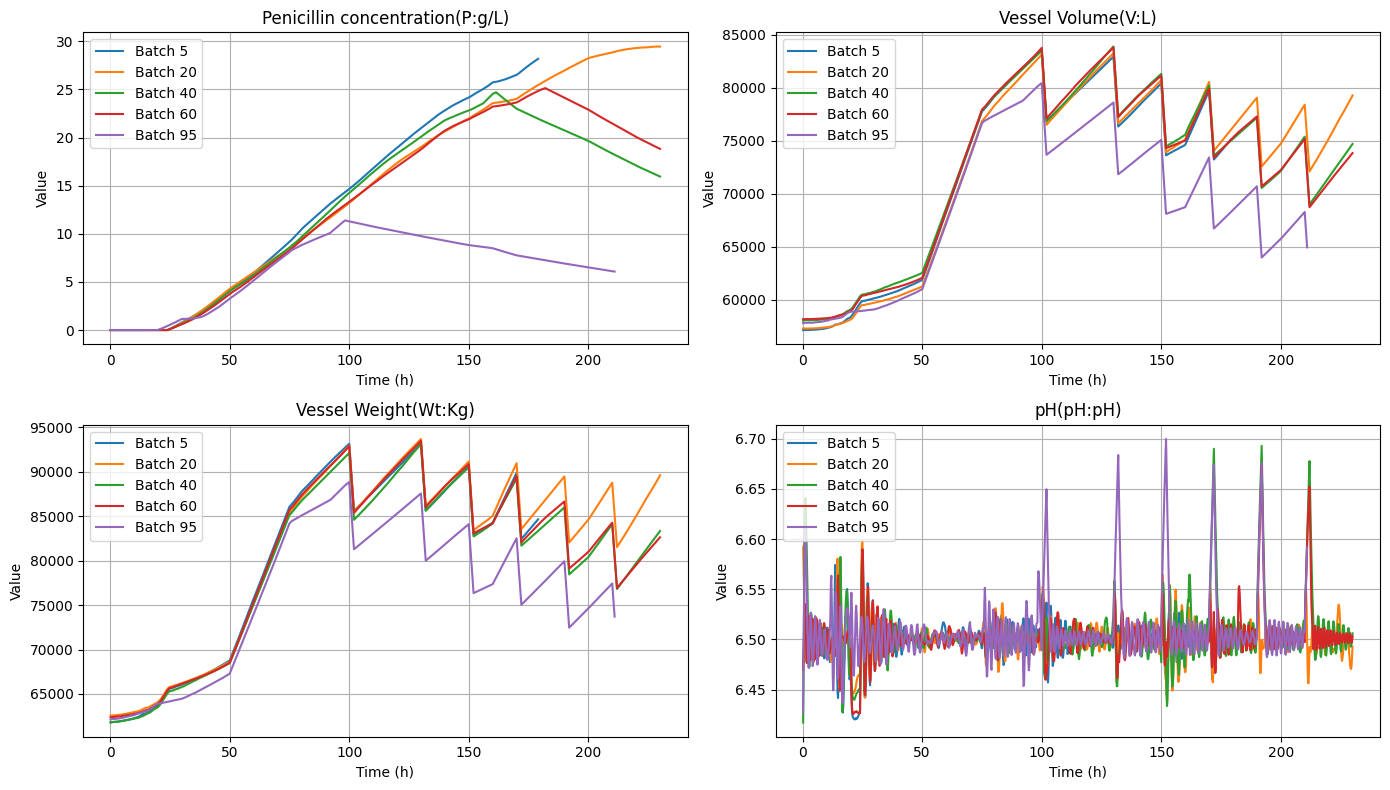

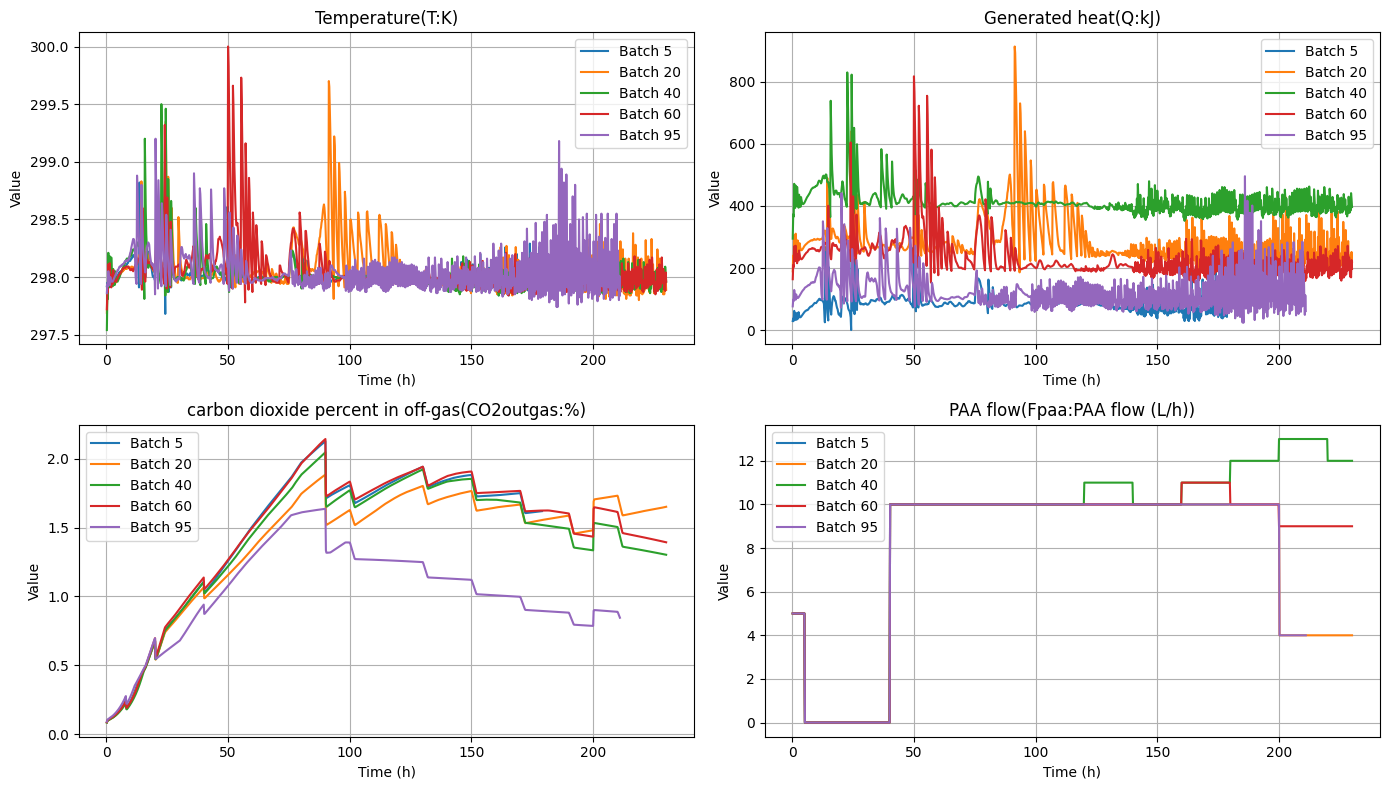

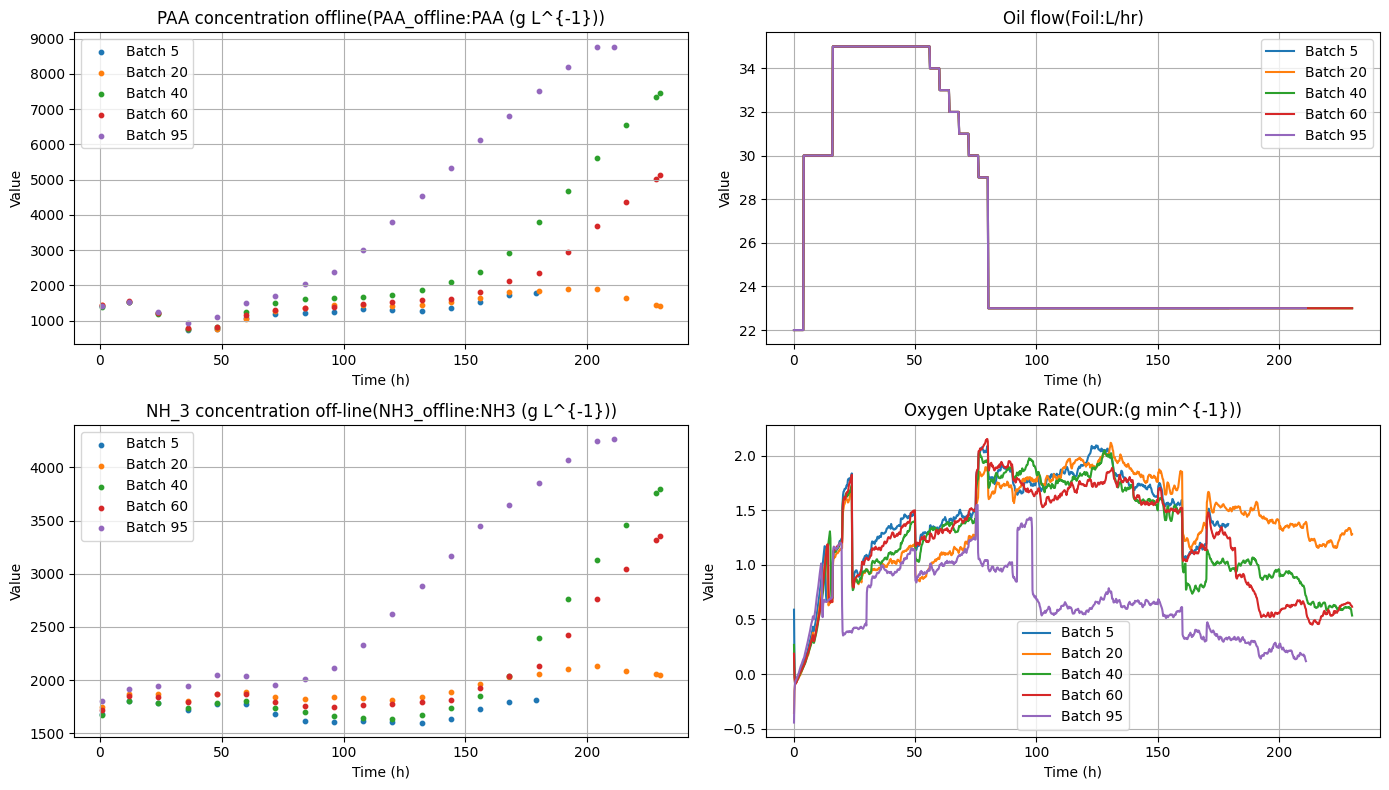

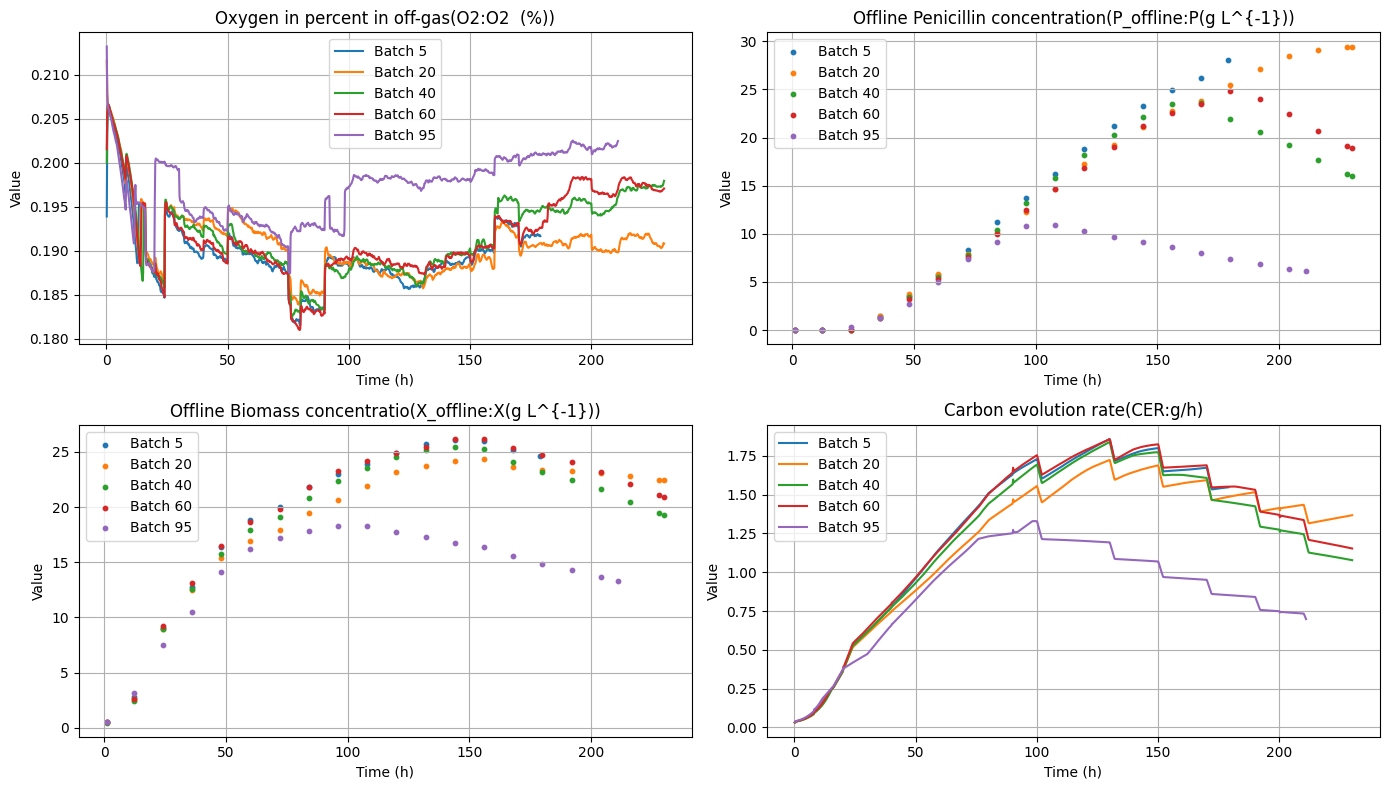

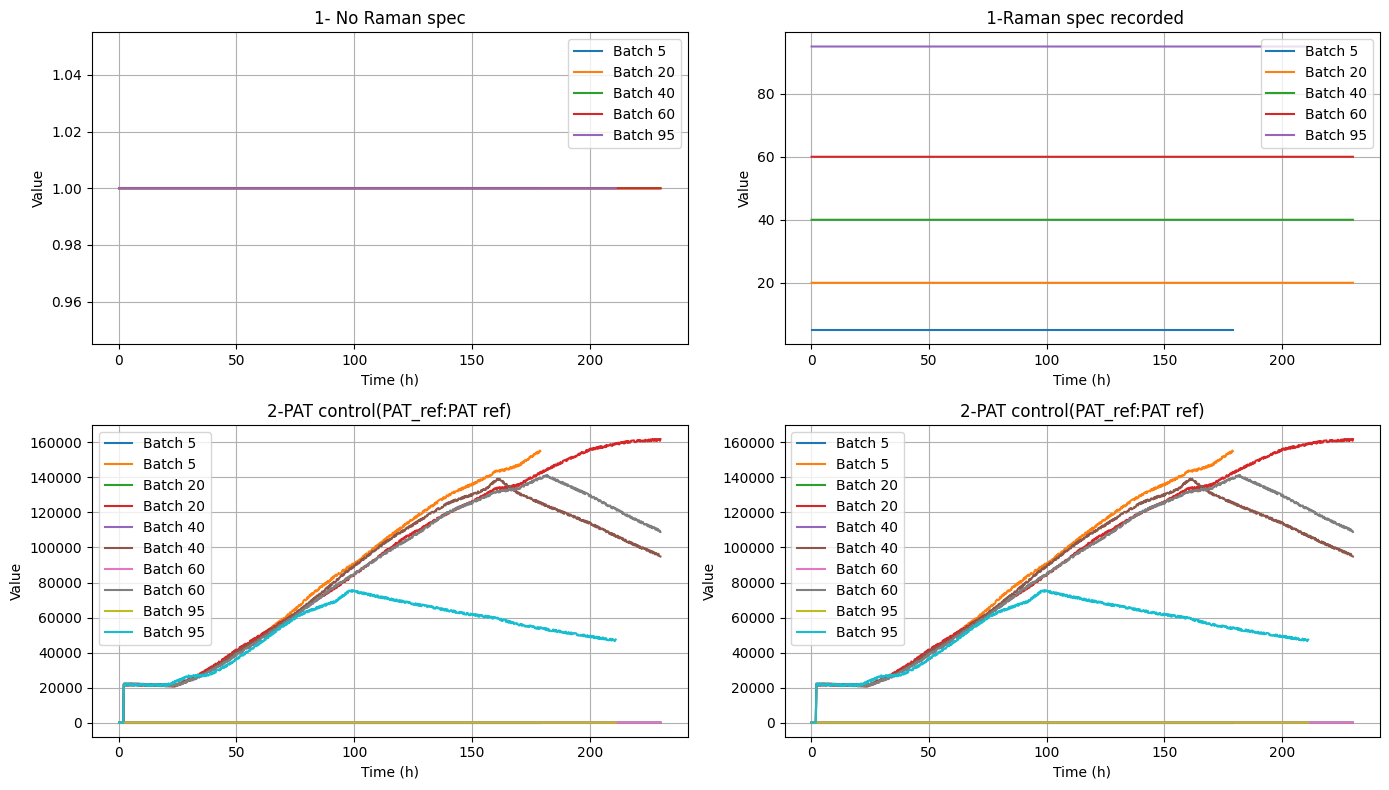

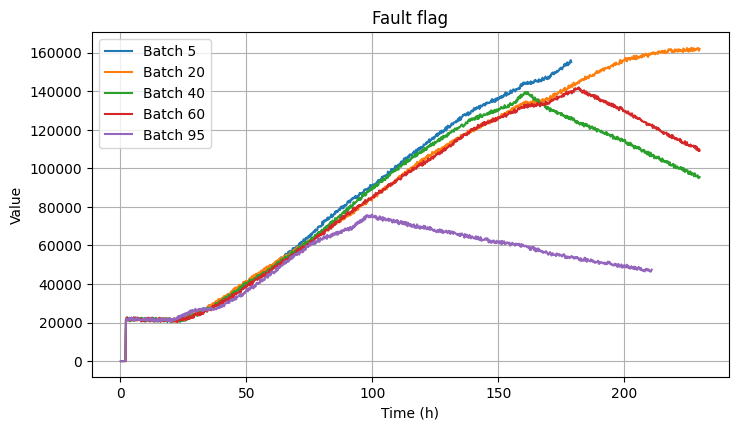

In [14]:
# Choose the batches you want to compare
batches_to_plot = [5, 20, 40, 60, 95]

# Columns to plot (exclude 'Batch ID' and 'Time (h)')
columns_to_plot = [col for col in process_data.columns if col not in ['Batch ID', 'Time (h)']]

# Interpolate selected columns 
columns_to_interpolate = [
    "PAA concentration offline(PAA_offline:PAA (g L^{-1}))",
    "NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))",
    "Offline Penicillin concentration(P_offline:P(g L^{-1}))",
    "Offline Biomass concentratio(X_offline:X(g L^{-1}))",
    "Viscosity(Viscosity_offline:centPoise)"
]

# Plot in subplots of 4 at a time
for i in range(0, len(columns_to_plot), 4):
    subset_cols = columns_to_plot[i:i+4]
    
    fig, axs = plt.subplots(2, 2, figsize=(14, 8))
    axs = axs.flatten()

    for j, col in enumerate(subset_cols):
        for batch in batches_to_plot:
            subset = process_data[process_data['Batch ID'] == batch]
            
            if col in columns_to_interpolate:  # sparse/offline column
                axs[j].scatter(subset['Time (h)'], subset[col], label=f'Batch {batch}', s=10)
            else:
                axs[j].plot(subset['Time (h)'], subset[col], label=f'Batch {batch}')
        
        axs[j].set_title(col)
        axs[j].set_xlabel("Time (h)")
        axs[j].set_ylabel("Value")
        axs[j].legend()
        axs[j].grid(True)

    # Hide empty subplots if there are fewer than 4
    for j in range(len(subset_cols), 4):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()


In [15]:
process_data_clean = process_data.drop(["1- No Raman spec",
                   "0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref)",
                   " 1-Raman spec recorded",
                   "2-PAT control(PAT_ref:PAT ref)",
                   "2-PAT control(PAT_ref:PAT ref)",
                   "0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref)",
                   "Fault flag",
                   "Fault reference(Fault_ref:Fault ref)",
                   "Aeration rate(Fg:L/h)",
                   "Agitator RPM(RPM:RPM)",
                   "Water for injection/dilution(Fw:L/h)",
                   "Air head pressure(pressure:bar)",
                   "Oil flow(Foil:L/hr)",
                   "Ammonia shots(NH3_shots:kgs)"],
                                 axis=1)

In [16]:
process_data.shape

(113935, 39)

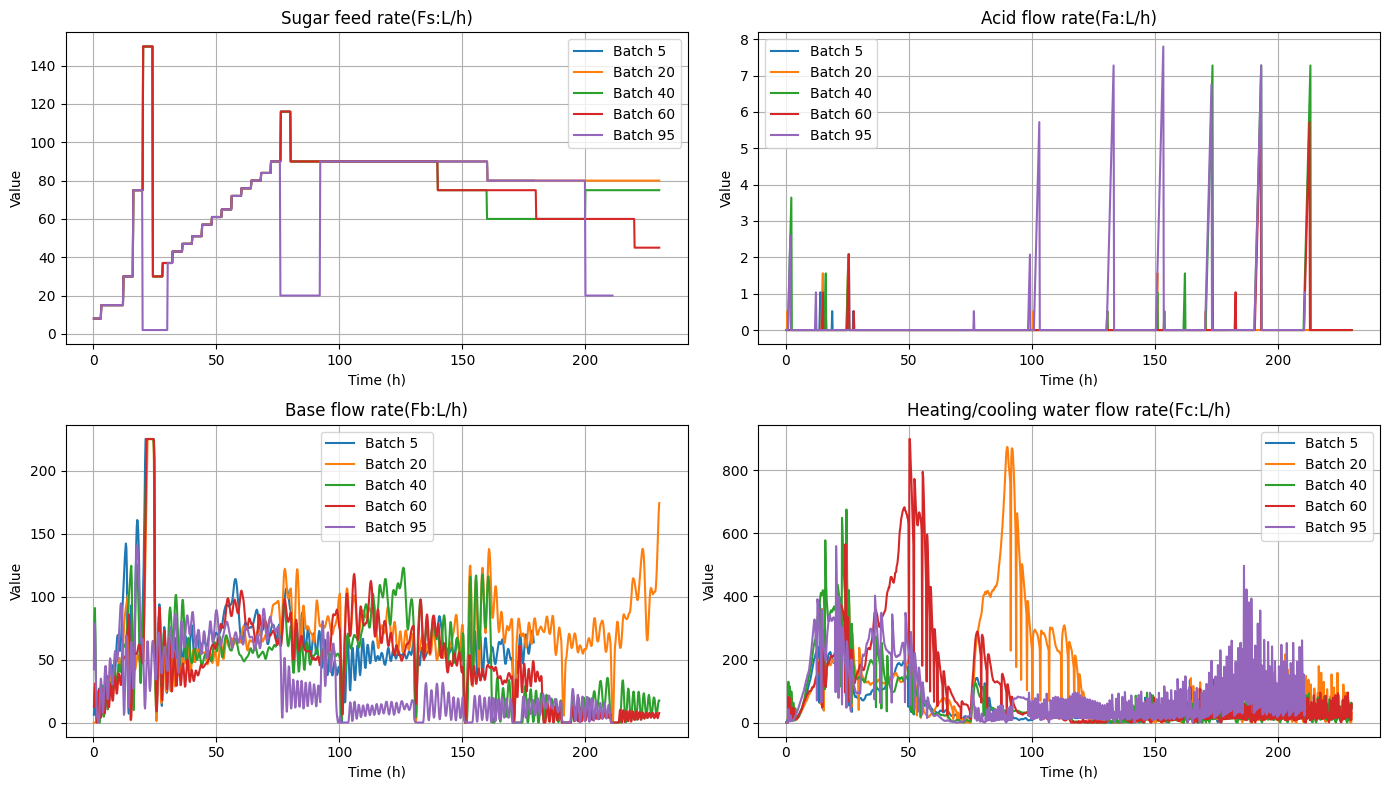

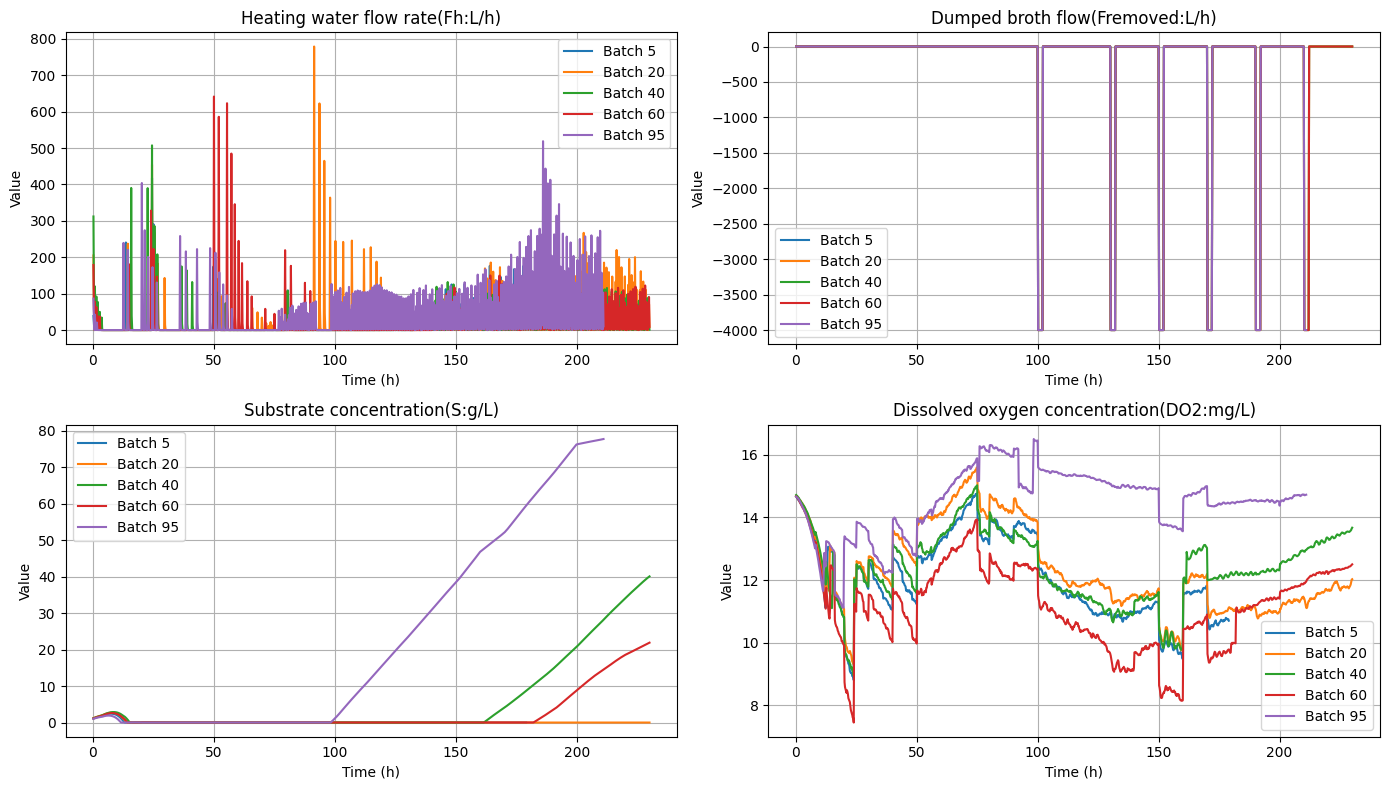

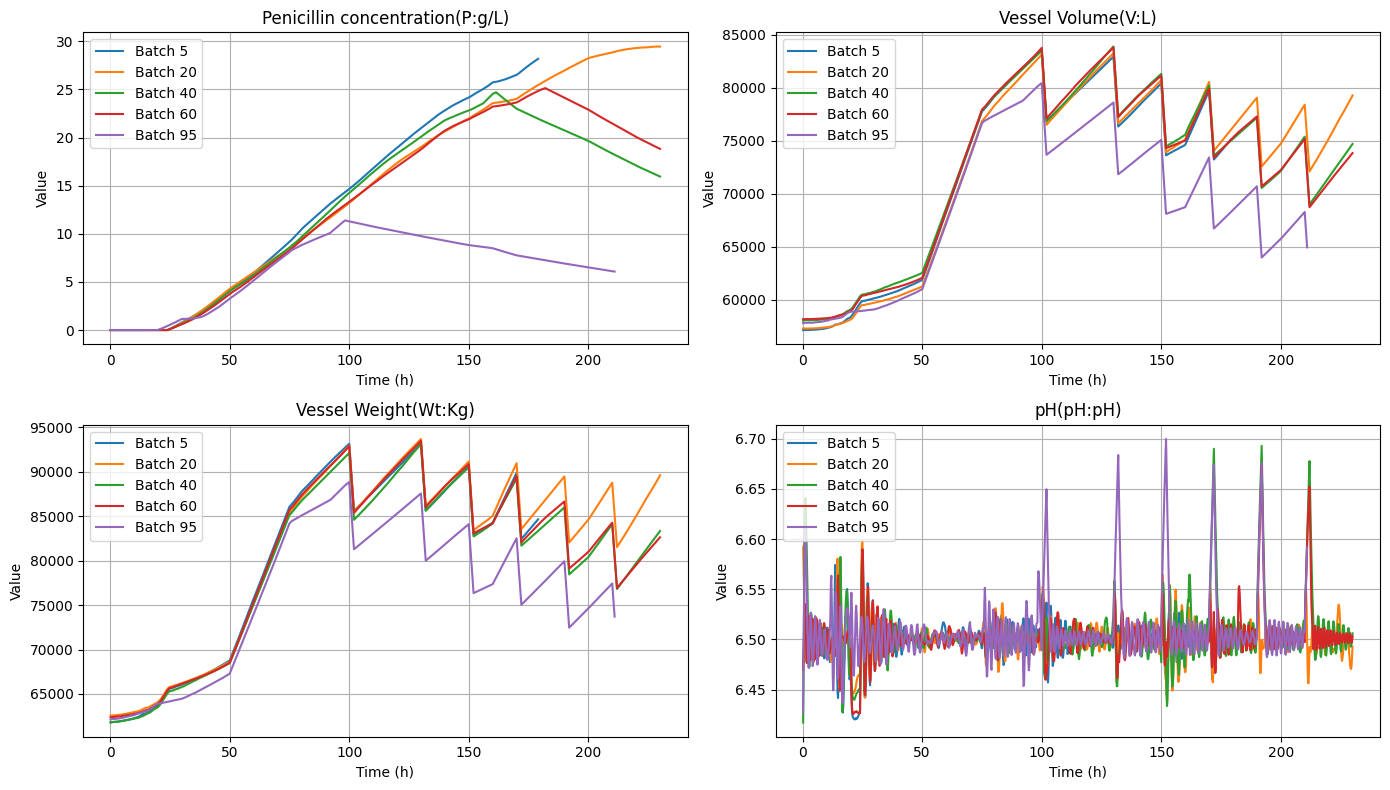

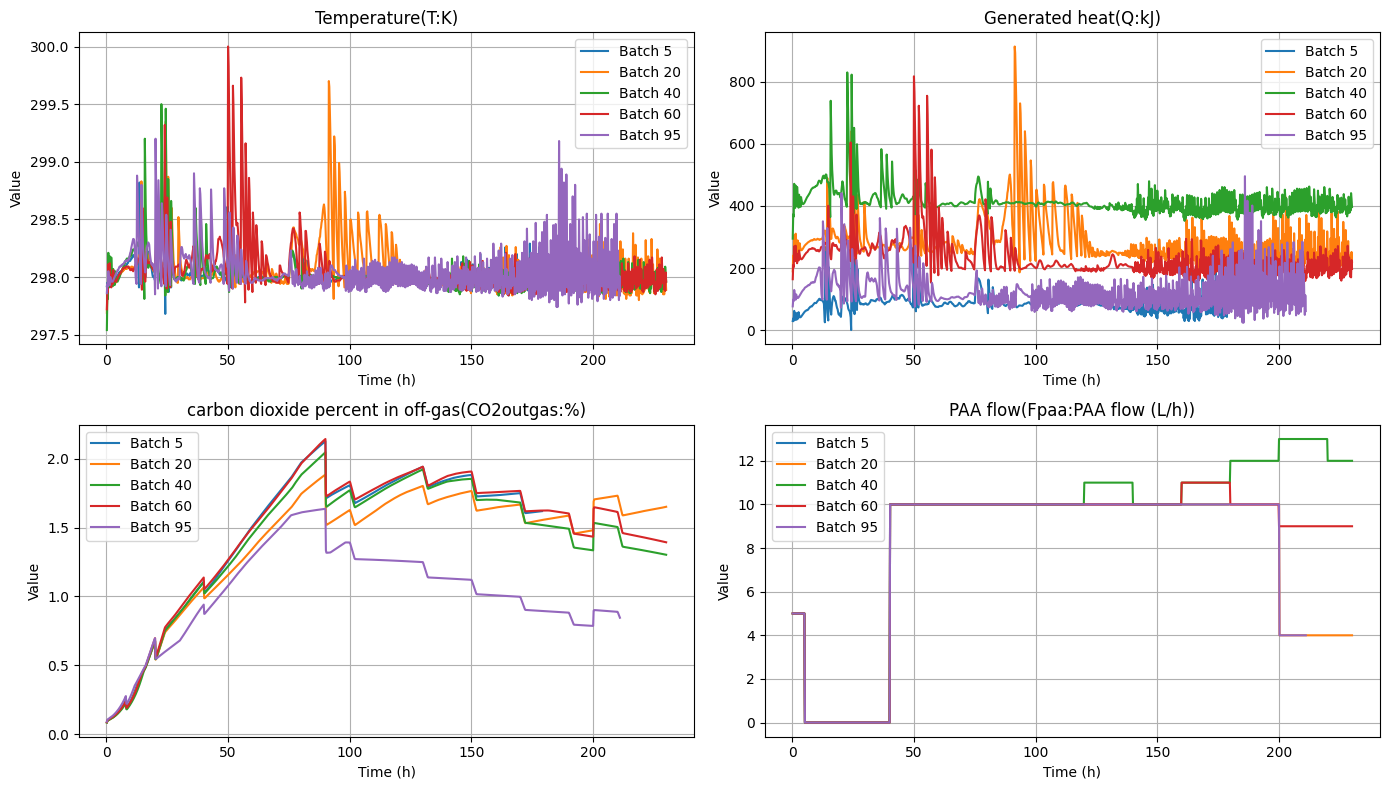

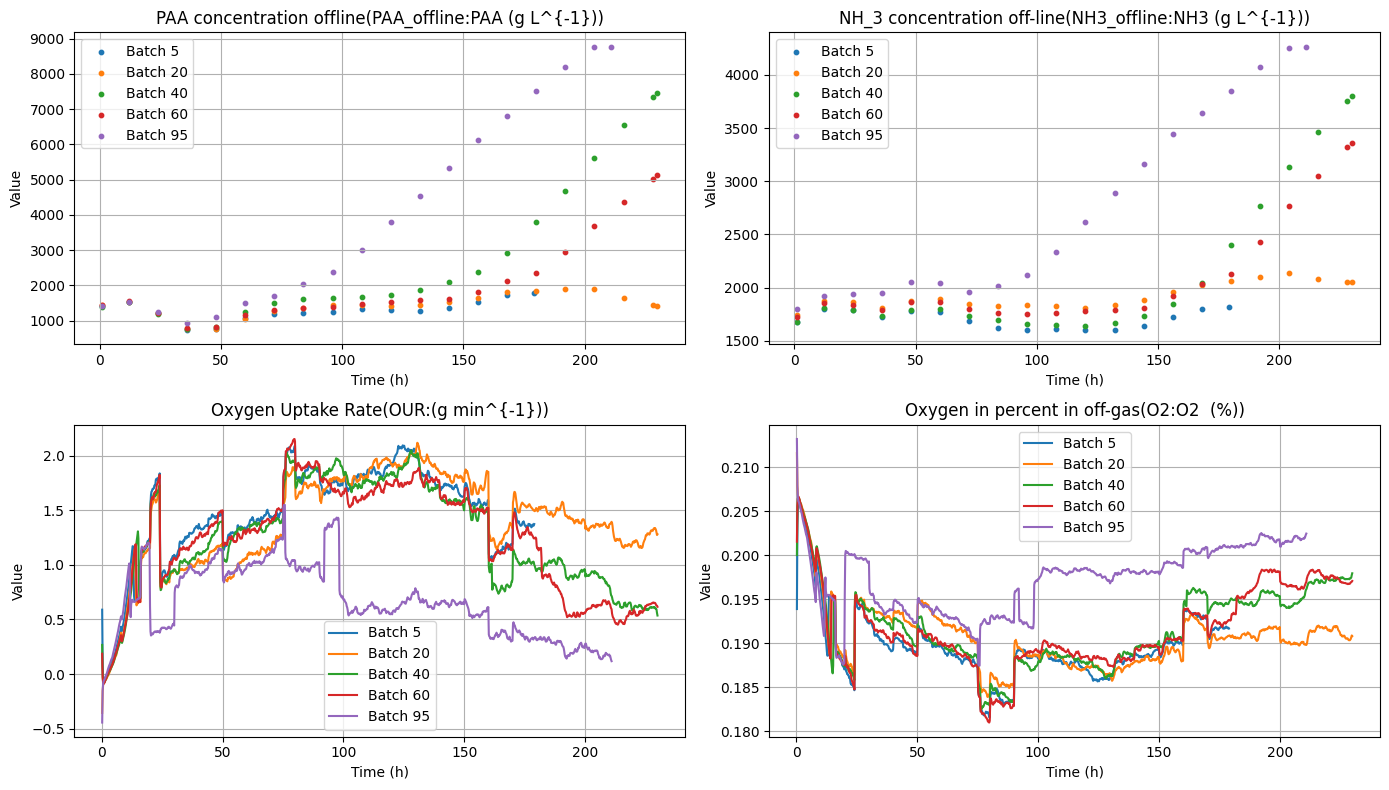

In [17]:
# Choose the batches you want to compare
batches_to_plot = [5, 20, 40, 60, 95]

# Columns to plot (exclude 'Batch ID' and 'Time (h)')
columns_to_plot = [col for col in process_data_clean.columns if col not in ['Batch ID', 'Time (h)']]

# Interpolate selected columns 
columns_to_interpolate = [
    "PAA concentration offline(PAA_offline:PAA (g L^{-1}))",
    "NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))",
    "Offline Penicillin concentration(P_offline:P(g L^{-1}))",
    "Offline Biomass concentratio(X_offline:X(g L^{-1}))",
    "Viscosity(Viscosity_offline:centPoise)"
]

# Plot in subplots of 4 at a time
for i in range(0, len(columns_to_plot), 4):
    subset_cols = columns_to_plot[i:i+4]
    
    fig, axs = plt.subplots(2, 2, figsize=(14, 8))
    axs = axs.flatten()

    for j, col in enumerate(subset_cols):
        for batch in batches_to_plot:
            subset = process_data_clean[process_data_clean['Batch ID'] == batch]
            
            if col in columns_to_interpolate:  # sparse/offline column
                axs[j].scatter(subset['Time (h)'], subset[col], label=f'Batch {batch}', s=10)
            else:
                axs[j].plot(subset['Time (h)'], subset[col], label=f'Batch {batch}')
        
        axs[j].set_title(col)
        axs[j].set_xlabel("Time (h)")
        axs[j].set_ylabel("Value")
        axs[j].legend()
        axs[j].grid(True)

    # Hide empty subplots if there are fewer than 4
    for j in range(len(subset_cols), 4):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()


In [18]:
process_data_clean.describe()

Time (h)  Sugar feed rate(Fs:L/h)  Acid flow rate(Fa:L/h)  \
count  113935.000000            113935.000000           113935.000000   
mean      114.750656                76.663764                0.073209   
std        66.990504                25.680134                0.552788   
min         0.200000                 2.000000                0.000000   
25%        57.000000                72.000000                0.000000   
50%       114.000000                80.000000                0.000000   
75%       171.000000                90.000000                0.000000   
max       290.000000               150.000000               12.996000   

       Base flow rate(Fb:L/h)  Heating/cooling water flow rate(Fc:L/h)  \
count           113935.000000                            113935.000000   
mean                61.334389                                74.346341   
std                 44.972713                               108.022600   
min                  0.000000                                 0.000100   
25%                 35.766000                                11.157000   
50%                 55.407000                                34.384000   
75%                 76.271500                                94.904500   
max                225.000000                              1500.000000   

       Heating water flow rate(Fh:L/h)  Dumped broth flow(Fremoved:L/h)  \
count                    113935.000000                    113935.000000   
mean                         20.763025                      -214.508272   
std                          50.230266                       901.125084   
min                           0.000100                     -4000.000000   
25%                           0.000100                         0.000000   
50%                           0.159010                         0.000000   
75%                          11.640500                         0.000000   
max                        1500.000000                         0.000000   

       Substrate concentration(S:g/L)  \
count                   113935.000000   
mean                         4.079817   
std                         13.303517   
min                          0.000006   
25%                          0.001025   
50%                          0.001644   
75%                          0.003003   
max                        115.270000   

       Dissolved oxygen concentration(DO2:mg/L)  \
count                             113935.000000   
mean                                  12.569647   
std                                    1.498680   
min                                    1.000000   
25%                                   11.639000   
50%                                   12.636000   
75%                                   13.614000   
max                                   16.508000   

       Penicillin concentration(P:g/L)  ...  PAA flow(Fpaa:PAA flow (L/h))  \
count                     1.139350e+05  ...                  113935.000000   
mean                      1.433395e+01  ...                       7.642712   
std                       9.932453e+00  ...                       3.560204   
min                       3.694700e-26  ...                       0.000000   
25%                       5.531250e+00  ...                       5.844400   
50%                       1.438000e+01  ...                       9.791200   
75%                       2.268750e+01  ...                      10.000000   
max                       3.618300e+01  ...                      15.000000   

       PAA concentration offline(PAA_offline:PAA (g L^{-1}))  \
count                                        2062.000000       
mean                                         1887.750349       
std                                          1581.477997       
min                                           393.100000       
25%                                          1198.500000       
50%                                          1263.300000       
75%                           

In [19]:
import ipywidgets as widgets
variable_list = process_data_clean.columns

variable_plot_selection = widgets.Dropdown(options=variable_list, value = 'Penicillin concentration(P:g/L)')
variable_plot_selection


Dropdown(index=9, options=('Time (h)', 'Sugar feed rate(Fs:L/h)', 'Acid flow rate(Fa:L/h)', 'Base flow rate(Fb…

Text(0, 0.5, 'Penicillin concentration(P:g/L)')

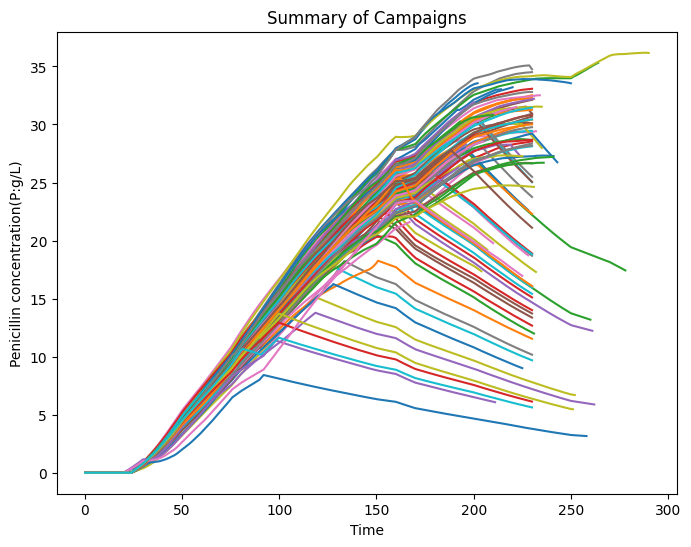

In [20]:
fig, ax = plt.subplots(figsize=(8,6))
bp = process_data_clean.groupby('Batch ID').plot(x = 'Time (h)', y = variable_plot_selection.value,   ax=ax, legend = False, )
ax.set_title('Summary of Campaigns')
ax.set_xlabel('Time')
ax.set_ylabel(variable_plot_selection.value)



## Raman Data plot 


In [21]:
raman_spectra_batch_id = raman_spectra_batch_id.groupby('Batch ID').get_group(1)

In [22]:
Intensity = raman_spectra.iloc[100:1208, 100:1500]
x_wave = raman_spectra.index[100:1500]
Temp = Intensity.transpose()
plt.figure(figsize=(10,6))
plt.plot(x_wave,Temp)
plt.ylabel('Intensity units')
plt.xlabel('Wavelengths (cm^(-1))')
plt.show()

In [23]:
df_raman = raman_spectra_batch_id
df_process = process_data_clean

In [24]:
df_raman.columns

Index(['Batch ID', '2400', '2399', '2398', '2397', '2396', '2395', '2394',
       '2393', '2392',
       ...
       '210', '209', '208', '207', '206', '205', '204', '203', '202', '201'],
      dtype='object', length=2201)

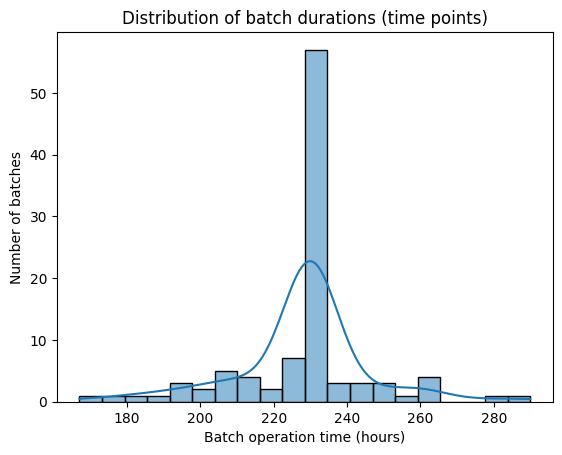

In [25]:
# plot the histogram of batches time 
batch_lengths = df_process.groupby('Batch ID')['Time (h)'].max() / 1
# batch_lengths.hist(bins=20)
import seaborn as sns

sns.histplot(data=batch_lengths, bins=20, kde=True)
plt.title('Distribution of batch durations (time points)')
plt.xlabel('Batch operation time (hours)')
plt.ylabel('Number of batches')
plt.show()

In [73]:
selected_vars = [
    'pH(pH:pH)',
    'Dissolved oxygen concentration(DO2:mg/L)',
    'Penicillin concentration(P:g/L)', 
    'Substrate concentration(S:g/L)',
    'Vessel Volume(V:L)',
    'carbon dioxide percent in off-gas(CO2outgas:%)',
    'Sugar feed rate(Fs:L/h)',
    #'Aeration rate(Fg:L/h)',
    'Oxygen Uptake Rate(OUR:(g min^{-1}))', 
    'Acid flow rate(Fa:L/h)',
    'PAA flow(Fpaa:PAA flow (L/h))'
]

# df_process = df_process.dropna(axis=1)
# # df_process = df_process.drop(["Time (h)", "Batch ID"], axis=1)
# selected_vars = df_process.drop(["Time (h)","Batch ID"], axis=1).columns

In [74]:
df_process.columns

Index(['Time (h)', 'Sugar feed rate(Fs:L/h)', 'Acid flow rate(Fa:L/h)',
       'Base flow rate(Fb:L/h)', 'Heating/cooling water flow rate(Fc:L/h)',
       'Heating water flow rate(Fh:L/h)', 'Dumped broth flow(Fremoved:L/h)',
       'Substrate concentration(S:g/L)',
       'Dissolved oxygen concentration(DO2:mg/L)',
       'Penicillin concentration(P:g/L)', 'Vessel Volume(V:L)',
       'Vessel Weight(Wt:Kg)', 'pH(pH:pH)', 'Temperature(T:K)',
       'Generated heat(Q:kJ)',
       'carbon dioxide percent in off-gas(CO2outgas:%)',
       'PAA flow(Fpaa:PAA flow (L/h))', 'Oxygen Uptake Rate(OUR:(g min^{-1}))',
       'Oxygen in percent in off-gas(O2:O2  (%))',
       'Carbon evolution rate(CER:g/h)', 'Batch ID'],
      dtype='object')

In [75]:
# def interpolate_batch(df, batch_id, vars_to_use, length=300):
#     batch_df = df[df['Batch reference(Batch_ref:Batch ref)'] == batch_id].sort_values('Time (h)')
#     new_time = np.linspace(batch_df['Time (h)'].min(), batch_df['Time (h)'].max(), length)
#     interp_df = pd.DataFrame({'Time (h)': new_time})
#     for var in vars_to_use:
#         interp_df[var] = np.interp(new_time, batch_df['Time (h)'], batch_df[var])
#     return interp_df[vars_to_use].values.flatten()

# batches = df_process['Batch reference(Batch_ref:Batch ref)'].unique()
# X_list = []

# for b in batches:
#     try:
#         X_list.append(interpolate_batch(df_process, b, selected_vars, length=300))
#     except:
#         continue  # skip problematic batches

# X_matrix = np.array(X_list)

def normalize_and_interpolate(df, batch_id, vars_to_use, length=200):
    batch_df = df[df['Batch ID'] == batch_id].sort_values('Time (h)')
    t = batch_df['Time (h)'].values
    t_norm = (t - t.min()) / (t.max() - t.min())
    t_new = np.linspace(0, 1, length)
    
    interp_batch = []
    for var in vars_to_use:
        y = batch_df[var].values
        interp_vals = np.interp(t_new, t_norm, y)
        interp_batch.extend(interp_vals)
    return interp_batch

batches = df_process['Batch ID'].unique()
X_list = []
batch_ids_cleaned = []

for b in batches:
    interpolated = normalize_and_interpolate(df_process, b, selected_vars, length=200)
    if interpolated is not None:
        X_list.append(interpolated)
        batch_ids_cleaned.append(b)

X_matrix = np.array(X_list)
print(f"Final shape for PCA: {X_matrix.shape}")  # Should be (n_batches, 1000)


Final shape for PCA: (100, 2000)


In [76]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normalize
X_scaled = StandardScaler().fit_transform(X_matrix)

# PCA
pca = PCA(n_components=15)
scores = pca.fit_transform(X_scaled)

# Explained variance
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(scores[:, 0], scores[:, 1], c='blue', alpha=0.6)
plt.title('PCA Score Plot of Batches')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

Explained Variance Ratio: [0.22375032 0.14439156 0.06402295 0.05549411 0.0471988  0.04574002
 0.03331681 0.02615591 0.02518947 0.02281267 0.02079763 0.01815587
 0.01722081 0.01404847 0.0138213 ]


In [77]:
# Explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.xticks(np. arange(1, 16, step=1))
plt.xlim(0,15)
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.grid(True)
plt.show()

In [78]:
df = pd.merge(df_process, data_summary[['Batch ID','Faulty']], how="left", on="Batch ID")
df

Time (h)  Sugar feed rate(Fs:L/h)  Acid flow rate(Fa:L/h)  \
0            0.2                      8.0                  0.0000   
1            0.4                      8.0                  0.0000   
2            0.6                      8.0                  0.0000   
3            0.8                      8.0                  0.0000   
4            1.0                      8.0                  0.5181   
...          ...                      ...                     ...   
113930     229.2                     80.0                  0.0000   
113931     229.4                     80.0                  0.0000   
113932     229.6                     80.0                  0.0000   
113933     229.8                     80.0                  0.0000   
113934     230.0                     80.0                  0.0000   

        Base flow rate(Fb:L/h)  Heating/cooling water flow rate(Fc:L/h)  \
0                      30.1180                                   9.8335   
1                      51.2210                                  18.1550   
2                      54.3020                                   9.5982   
3                      37.8160                                   4.3395   
4                      18.9080                                   1.1045   
...                        ...                                      ...   
113930                 12.9000                                  33.5860   
113931                 10.0470                                  10.0760   
113932                  7.3609                                  69.3450   
113933                  6.2794                                  38.6100   
113934                  7.3055                                  11.5830   

        Heating water flow rate(Fh:L/h)  Dumped broth flow(Fremoved:L/h)  \
0                               0.00010                              0.0   
1                               0.00010                              0.0   
2                               0.00010                              0.0   
3                               0.00010                              0.0   
4                               0.00010                              0.0   
...                                 ...                              ...   
113930                          5.93590                              0.0   
113931                         98.83400                              0.0   
113932                          9.88340                              0.0   
113933                          0.98834                              0.0   
113934                         67.53600                              0.0   

        Substrate concentration(S:g/L)  \
0                              0.95749   
1                              1.00460   
2                              1.04980   
3                              1.09420   
4                              1.13700   
...                                ...   
113930                        72.70800   
113931                        72.77400   
113932                        72.84200   
113933                        72.91000   
113934                        72.97900   

        Dissolved oxygen concentration(DO2:mg/L)  \
0                                         14.711   
1                                         14.699   
2                                         14.686   
3                                         14.661   
4                                         14.633   
...                                          ...   
113930                                    13.385   
113931                                    13.388   
113932                                    13.390   
113933                                    13.390   
113934                                    13.407   

        Penicillin concentration(P:g/L)  ...  pH(pH:pH)  Temperature(T:K)  \
0                          1.017800e-25  ...     6.4472            298.22   
1                          1.000000e-03  ...     6.4932            298.17   
2   

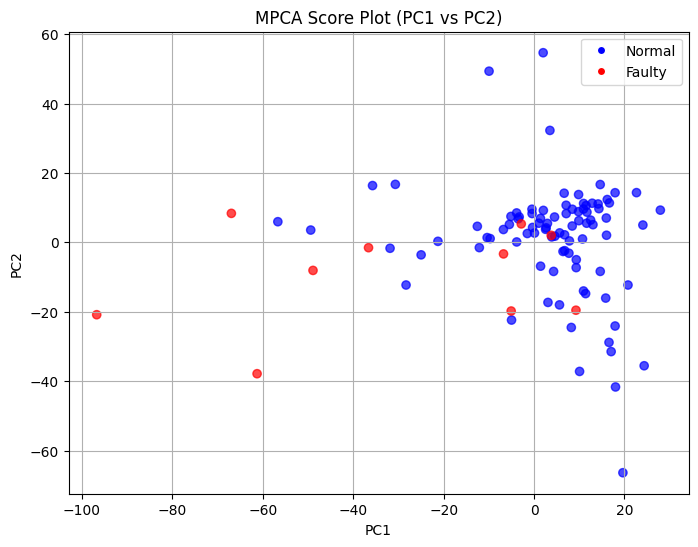

In [79]:
# Get fault labels
fault_flags = df[['Batch ID', 'Faulty']].drop_duplicates()
fault_map = dict(zip(fault_flags['Batch ID'], fault_flags['Faulty']))
colors = ['red' if fault_map.get(b, 0) == 1 else 'blue' for b in batch_ids_cleaned]

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(scores[:, 0], scores[:, 1], c=colors, alpha=0.7)
plt.title('MPCA Score Plot (PC1 vs PC2)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='Normal', markerfacecolor='blue'),
    plt.Line2D([0], [0], marker='o', color='w', label='Faulty', markerfacecolor='red')
])
plt.show()

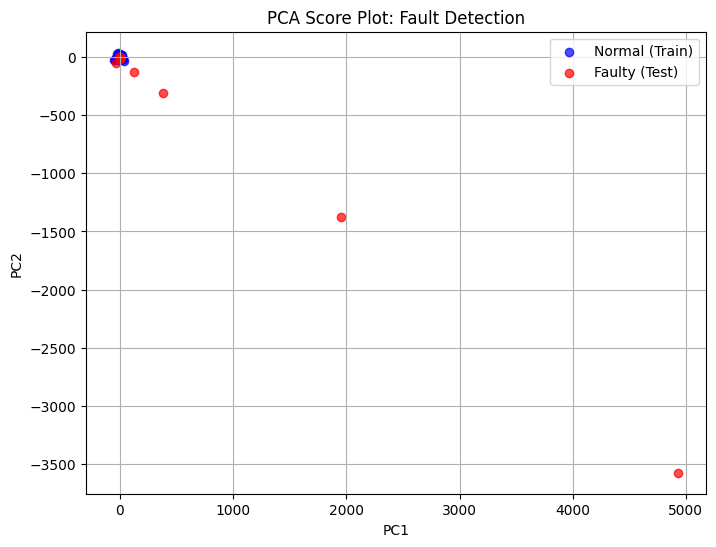

In [80]:
# Unique batch IDs with fault info
fault_flags = df[['Batch ID', 'Faulty']].drop_duplicates()

# Get normal and faulty batch IDs
normal_batches = fault_flags[fault_flags['Faulty'] == 0]['Batch ID'].tolist()
faulty_batches = fault_flags[fault_flags['Faulty'] == 1]['Batch ID'].tolist()

X_train = []
train_ids = []

for b in normal_batches:
    interpolated = normalize_and_interpolate(df_process, b, selected_vars, length=100)
    if interpolated is not None:
        X_train.append(interpolated)
        train_ids.append(b)

X_train = np.array(X_train)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

pca = PCA(n_components=2)
train_scores = pca.fit_transform(X_train_scaled)

X_test = []
test_ids = []

for b in faulty_batches:
    interpolated = normalize_and_interpolate(df_process, b, selected_vars, length=100)
    if interpolated is not None:
        X_test.append(interpolated)
        test_ids.append(b)

X_test = np.array(X_test)
X_test_scaled = scaler.transform(X_test)  # Use same scaler!
test_scores = pca.transform(X_test_scaled)  # Project onto PCA space

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(train_scores[:, 0], train_scores[:, 1], c='blue', label='Normal (Train)', alpha=0.7)
plt.scatter(test_scores[:, 0], test_scores[:, 1], c='red', label='Faulty (Test)', alpha=0.7)
plt.xlabel('PC1')
# plt.xlim(-200,20)
# plt.ylim(-250,50)
plt.ylabel('PC2')
plt.title('PCA Score Plot: Fault Detection')
plt.grid(True)
plt.legend()
plt.show()


